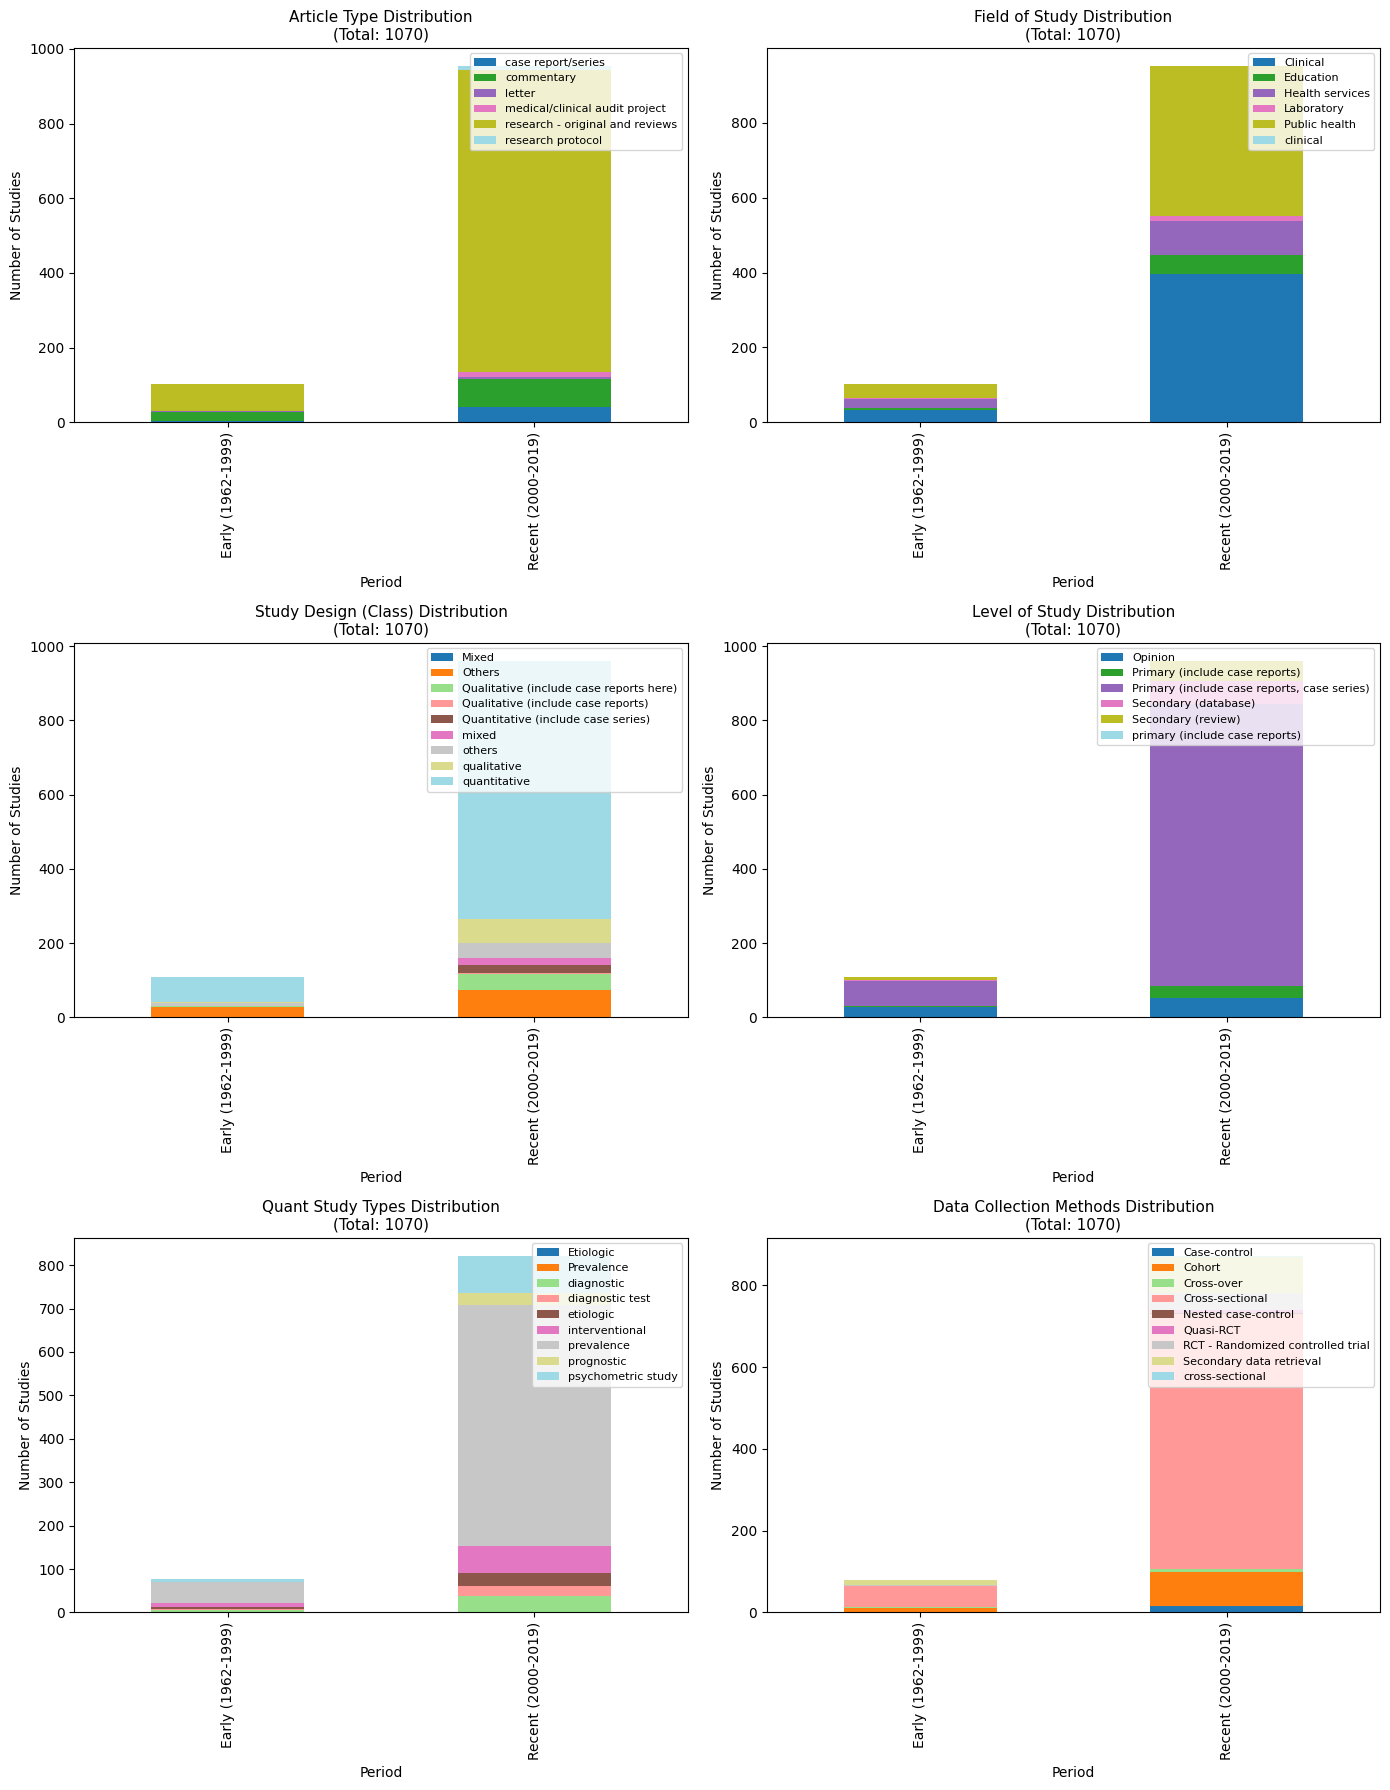

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# 1. LOAD DATA
# -------------------------
df = pd.read_csv("REALQUAMI_Dataset_Merged.csv")  # Adjust file name/path as needed

# If 'Period' column doesn't exist yet, define it using 'IDyear'
# We'll classify each row as Early (1962-1999) vs. Recent (2000-2019).
# If you already have a Period column, skip or adjust this part.
df['IDyear'] = pd.to_numeric(df['IDyear'], errors='coerce')
df['Period'] = df['IDyear'].apply(lambda x: 'Early (1962-1999)' if x < 2000 else 'Recent (2000-2019)')

# -------------------------
# 2. CREATE PIVOT TABLES
# -------------------------
# We'll define a helper function to pivot by 'Period' vs. each variable
def pivot_by_period(dataframe, col_name):
    """
    Returns a pivot table of 'Period' (index) x 'col_name' (columns),
    counting the number of occurrences (size).
    """
    return dataframe.pivot_table(index='Period', columns=col_name, aggfunc='size', fill_value=0)

# For each variable of interest, create a pivot table
pivot_article = pivot_by_period(df, 'Article')
pivot_field   = pivot_by_period(df, 'Field')
pivot_class   = pivot_by_period(df, 'Class')
pivot_level   = pivot_by_period(df, 'Level')
pivot_quanti  = pivot_by_period(df, 'CatQuanti')
pivot_datac   = pivot_by_period(df, 'DataCollect')

# We'll store them in a list for easy iteration
pivots = [
    ("Article Type Distribution", pivot_article),
    ("Field of Study Distribution", pivot_field),
    ("Study Design (Class) Distribution", pivot_class),
    ("Level of Study Distribution", pivot_level),
    ("Quant Study Types Distribution", pivot_quanti),
    ("Data Collection Methods Distribution", pivot_datac),
]

# -------------------------
# 3. PLOT THE SIX SUBPLOTS
# -------------------------
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))  # 3 rows, 2 columns
axes = axes.flatten()  # easier iteration over axes

for ax, (title, pivot_df) in zip(axes, pivots):
    pivot_df.plot(
        kind='bar', stacked=True, ax=ax, colormap='tab20'
    )
    ax.set_title(f"{title}\n(Total: {df.shape[0]})", fontsize=11)  # e.g. (Total: 1078)
    ax.set_xlabel("Period")
    ax.set_ylabel("Number of Studies")
    ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

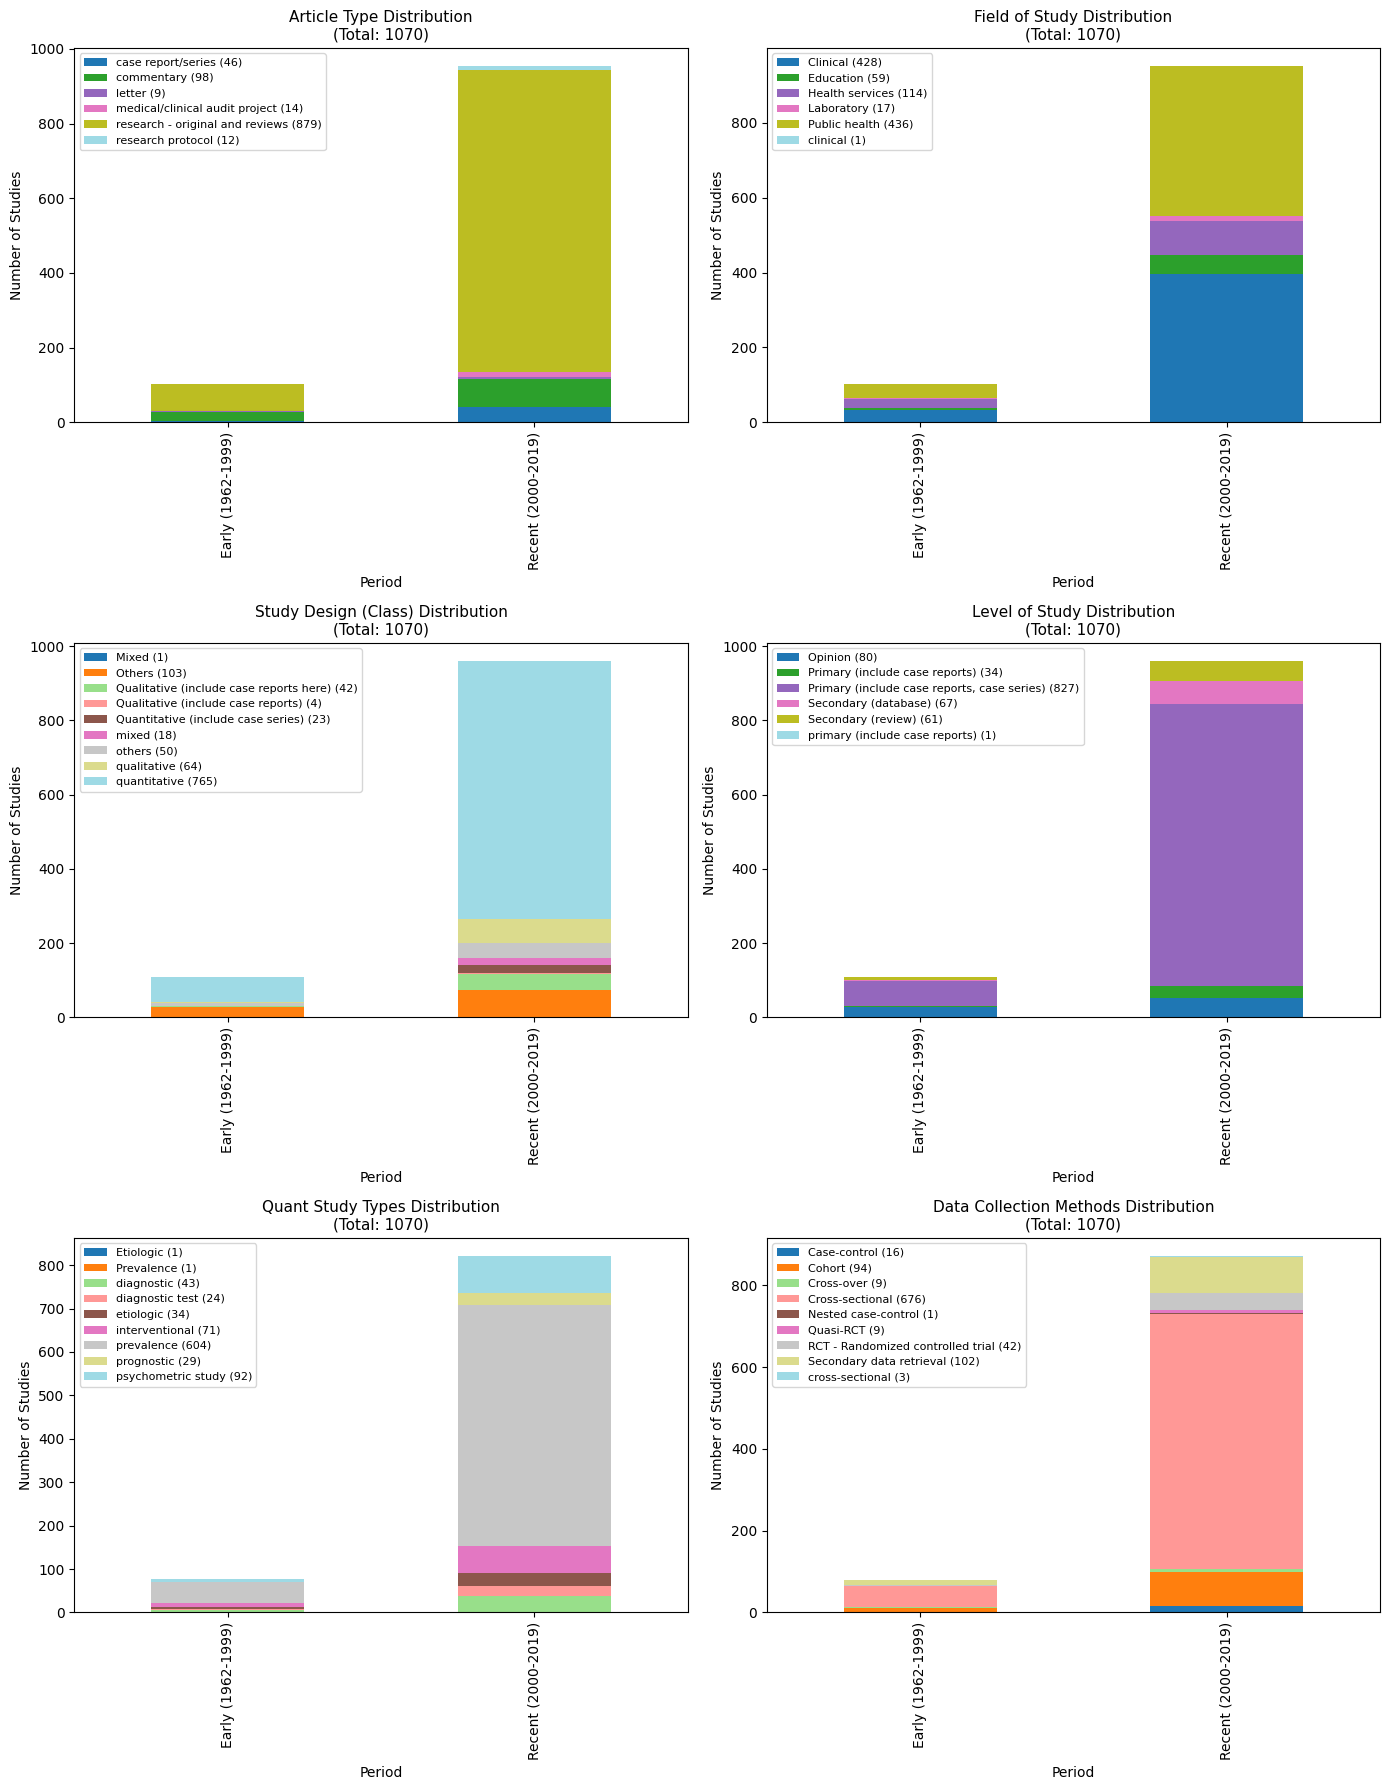

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Suppose you already have a list of (title, pivot_table) called 'pivots'
# For example:
# pivots = [
#     ("Article Type Distribution", pivot_article),
#     ("Field of Study Distribution", pivot_field),
#     ("Study Design (Class) Distribution", pivot_class),
#     ("Level of Study Distribution", pivot_level),
#     ("Quant Study Types Distribution", pivot_quanti),
#     ("Data Collection Methods Distribution", pivot_datac),
# ]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for ax, (title, pivot_df) in zip(axes, pivots):
    # 1. Calculate total counts per subvariable (column)
    col_sums = pivot_df.sum(axis=0)  # sum across rows => sum for each subvariable

    # 2. Create a rename map: original column -> "original column (count)"
    rename_map = {}
    for col in pivot_df.columns:
        total_for_col = col_sums[col]
        rename_map[col] = f"{col} ({total_for_col})"

    # 3. Rename the pivot table's columns
    pivot_renamed = pivot_df.rename(columns=rename_map)

    # 4. Plot the renamed pivot table
    pivot_renamed.plot(
        kind='bar',
        stacked=True,
        ax=ax,
        colormap='tab20'
    )

    # 5. Set chart title and axes
    #    For example: "(Total: 1078)" if df.shape[0] == 1078
    ax.set_title(f"{title}\n(Total: {df.shape[0]})", fontsize=11)
    ax.set_xlabel("Period")
    ax.set_ylabel("Number of Studies")

    # 6. Place legend in top-left to avoid overlapping bars
    ax.legend(
        loc='upper left',
        fontsize=8
    )

plt.tight_layout()
plt.show()

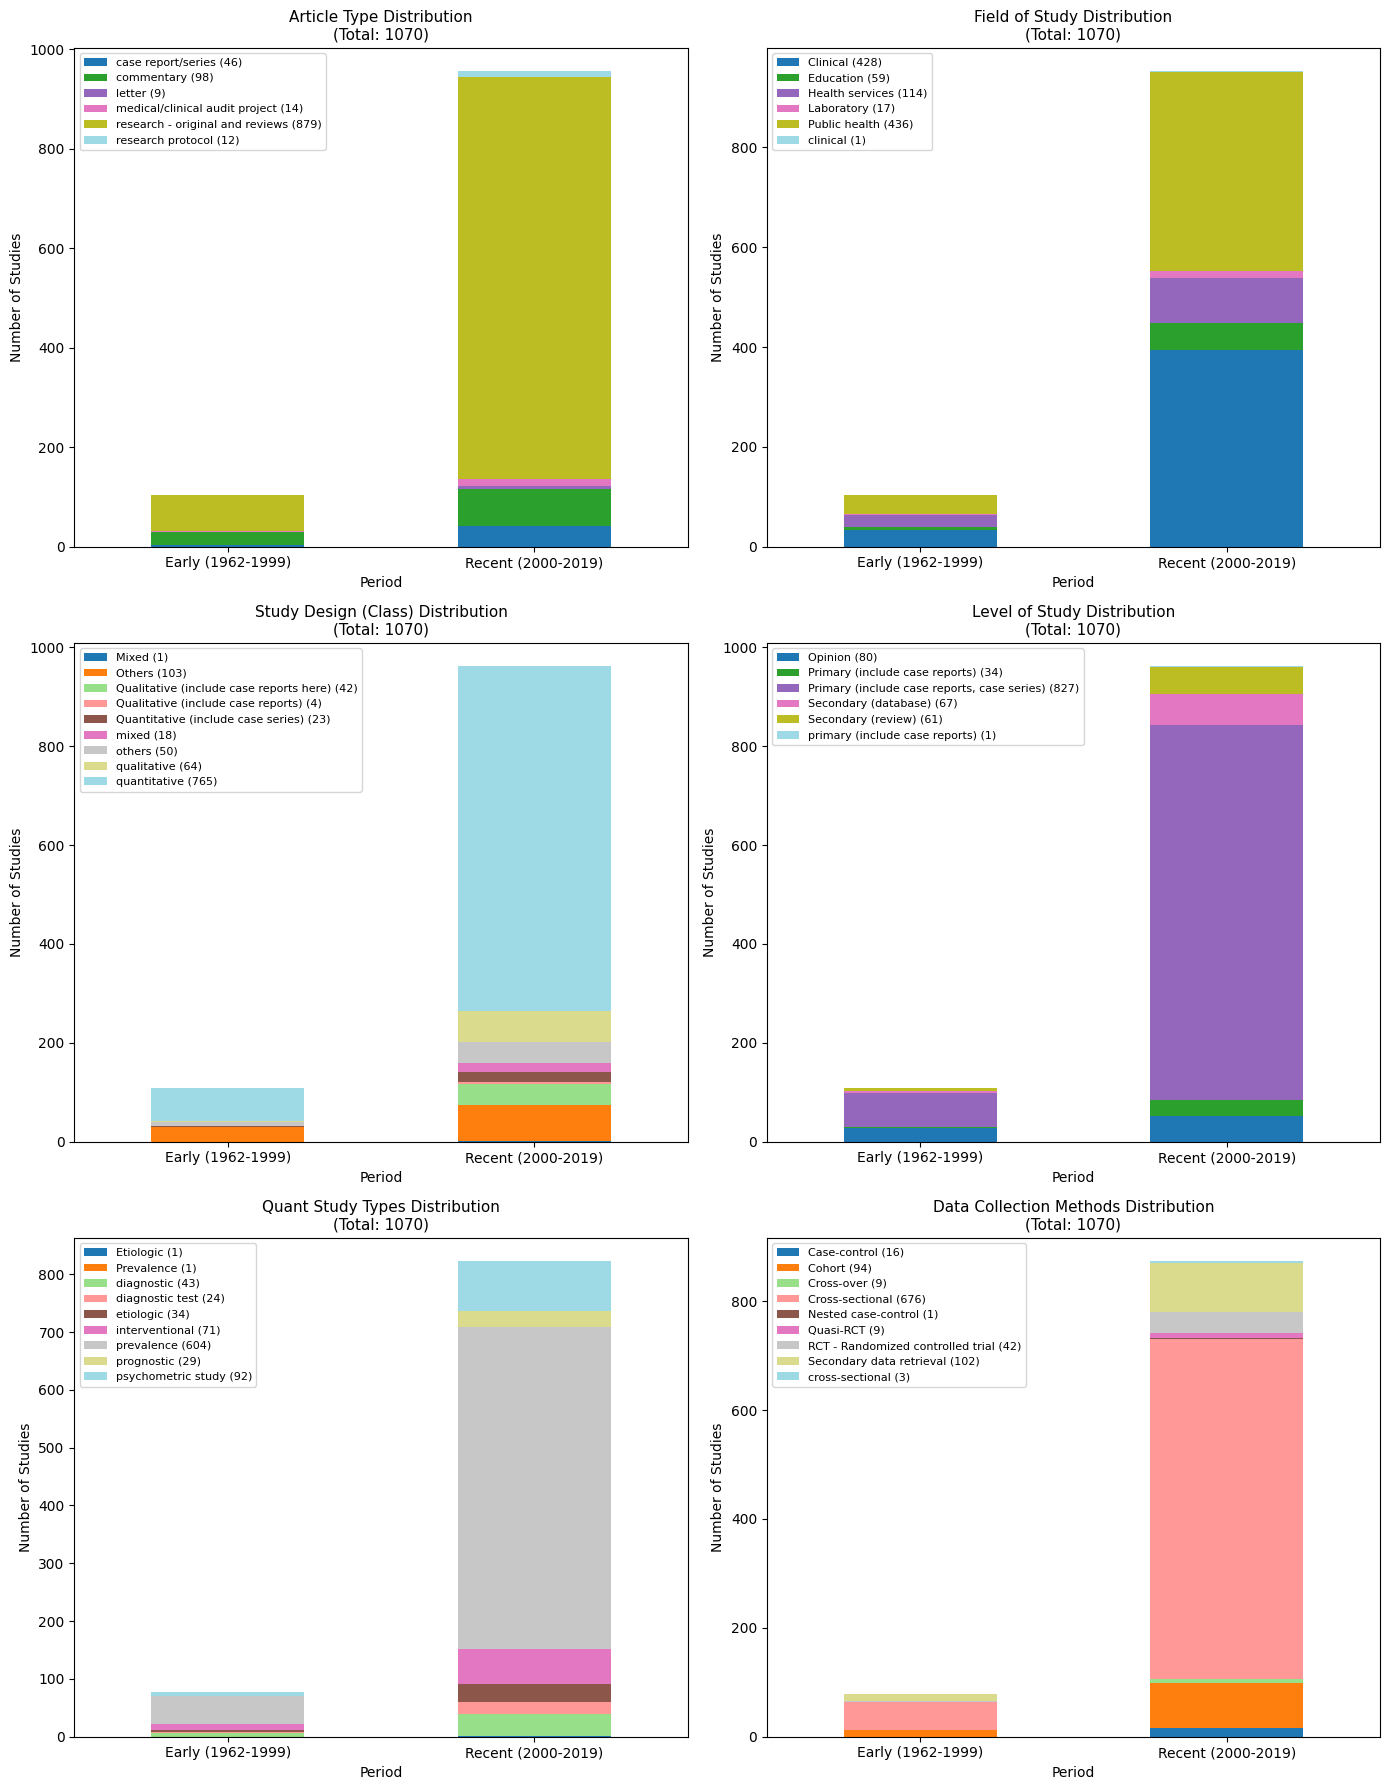

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Example pivot list: (title, pivot_df)
pivots = [
    ("Article Type Distribution", pivot_article),
    ("Field of Study Distribution", pivot_field),
    ("Study Design (Class) Distribution", pivot_class),
    ("Level of Study Distribution", pivot_level),
    ("Quant Study Types Distribution", pivot_quanti),
    ("Data Collection Methods Distribution", pivot_datac),
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for ax, (title, pivot_df) in zip(axes, pivots):
    # 1. Calculate total counts per subvariable
    col_sums = pivot_df.sum(axis=0)
    # 2. Build rename map
    rename_map = {col: f"{col} ({col_sums[col]})" for col in pivot_df.columns}
    # 3. Rename pivot columns
    pivot_renamed = pivot_df.rename(columns=rename_map)
    
    # 4. Plot
    pivot_renamed.plot(
        kind='bar', 
        stacked=True, 
        ax=ax, 
        colormap='tab20'
    )
    
    # 5. Chart labels and legend
    ax.set_title(f"{title}\n(Total: {df.shape[0]})", fontsize=11)
    ax.set_xlabel("Period")
    ax.set_ylabel("Number of Studies")
    
    # Place legend in top-left
    ax.legend(loc='upper left', fontsize=8)
    
    # 6. Make x-axis labels horizontal
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

In [4]:
import pandas as pd

# Load your dataset
df = pd.read_csv("REALQUAMI_Dataset_Merged.csv")

# Make sure 'df' has the columns you need, e.g. Field, Class, Level, CatQuanti, DataCollect

# --- Merge redundant subvariables ---

# (A) Merge "Clinical" and "clinical" in Field
if "Field" in df.columns:
    df['Field'] = df['Field'].replace({
        'clinical': 'Clinical'
    })

# (B) Merge "Mixed"/"mixed", "Qualitative (include...)" / "qualitative", 
#     "Quantitative (include...)" / "quantitative", "Others"/"others" in Class
if "Class" in df.columns:
    df['Class'] = df['Class'].replace({
        'mixed': 'Mixed',
        'qualitative': 'Qualitative (include case reports)',  # or whichever descriptive label you prefer
        'quantitative': 'Quantitative (include case series)',
        'others': 'Others'
    })

# (C) Merge "Primary (include...)" and "primary (include...)" in Level
if "Level" in df.columns:
    df['Level'] = df['Level'].replace({
        'primary (include case reports, case series)': 'Primary (include case reports, case series)'
    })

# (D) Merge "Prevalence"/"prevalence", "Etiologic"/"etiologic" in CatQuanti
if "CatQuanti" in df.columns:
    df['CatQuanti'] = df['CatQuanti'].replace({
        'prevalence': 'Prevalence',
        'etiologic': 'Etiologic'
    })

# (E) Merge "Cross-section" and "cross-sectional" in DataCollect
if "DataCollect" in df.columns:
    df['DataCollect'] = df['DataCollect'].replace({
        'cross-sectional': 'Cross-sectional'
    })

print("Redundant labels merged successfully!")

Redundant labels merged successfully!


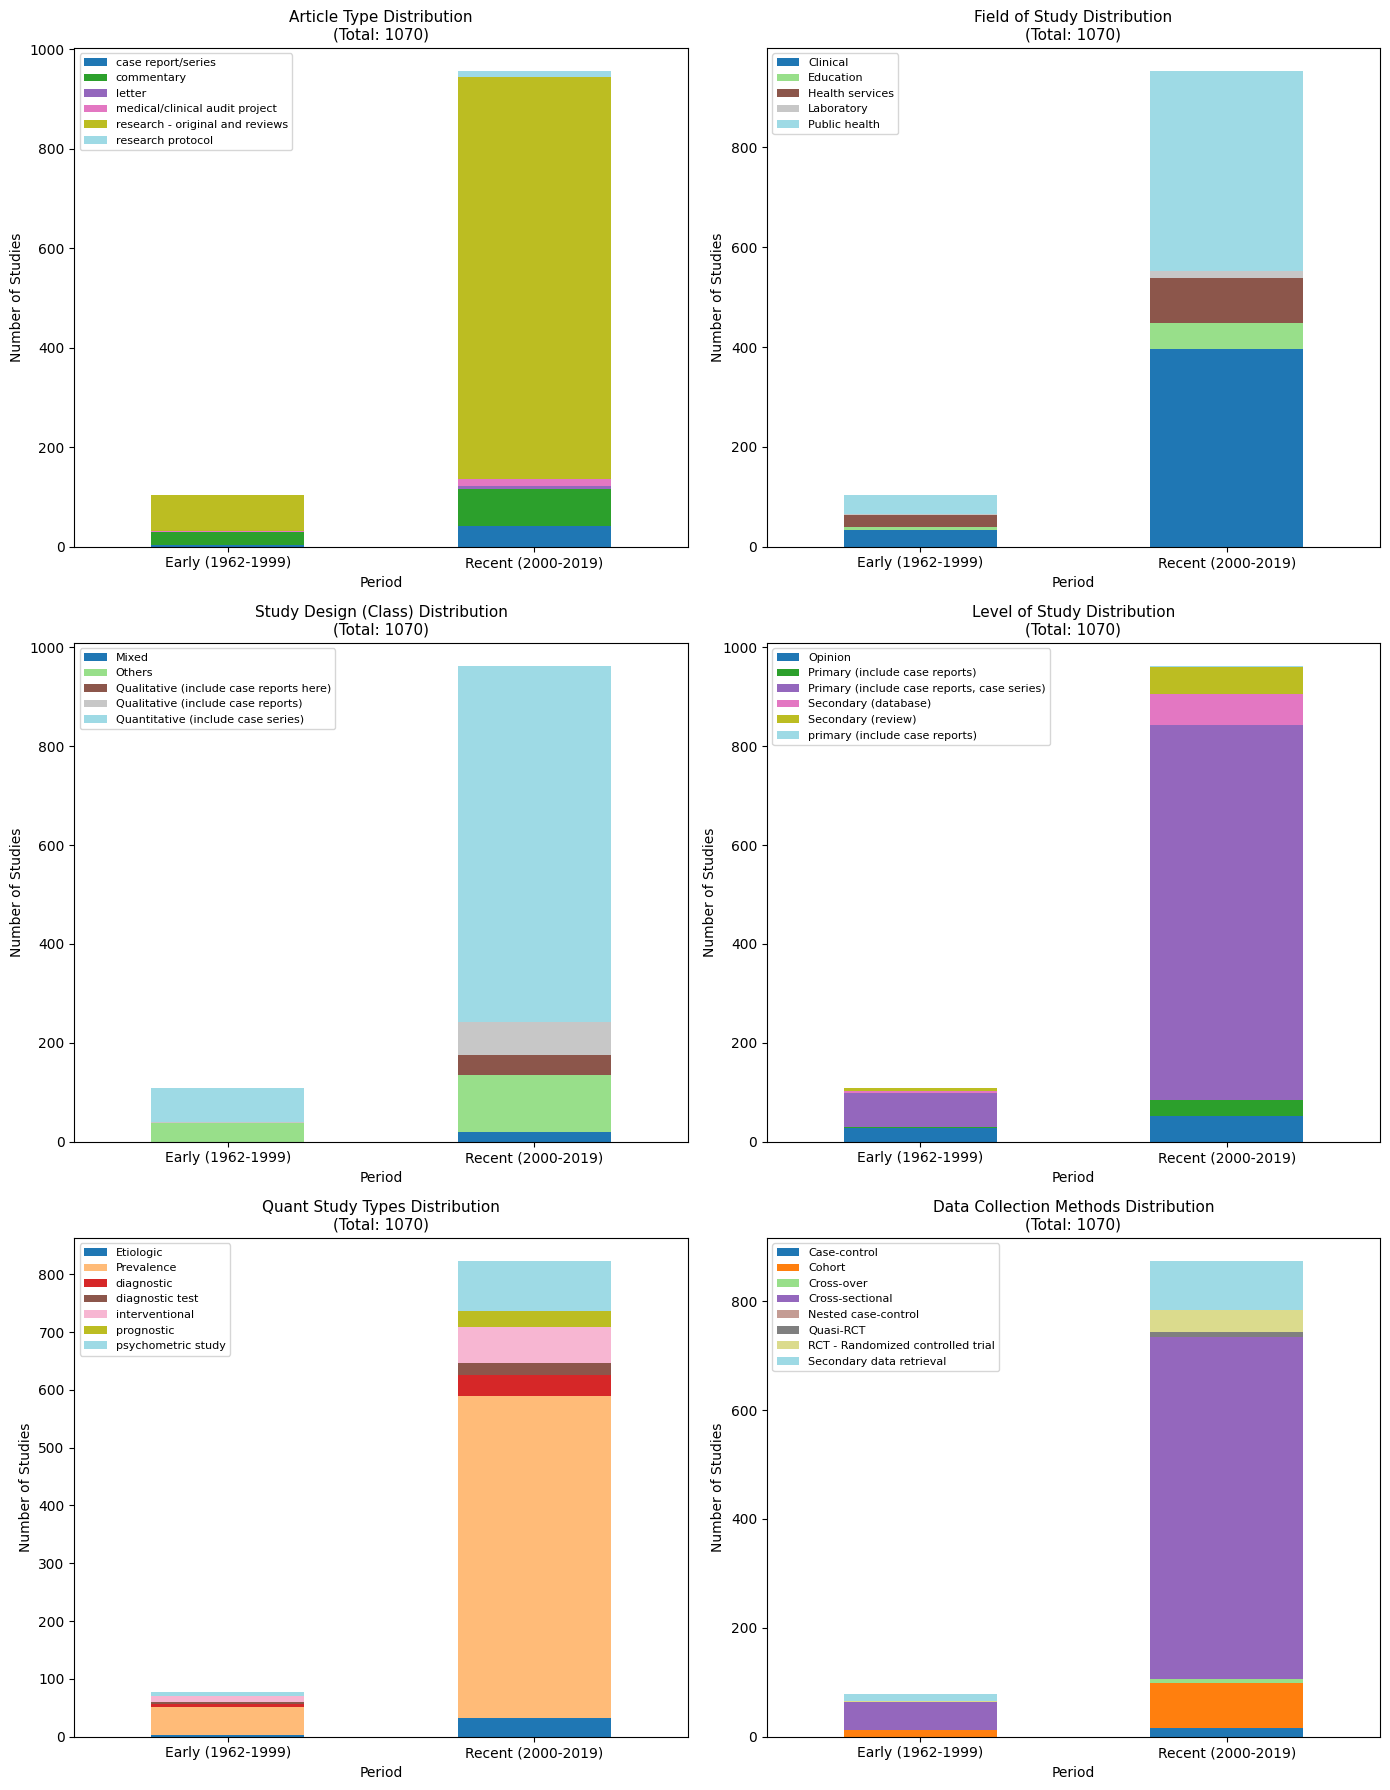

In [5]:
import matplotlib.pyplot as plt

# Suppose we define Period first, if not already:
df['IDyear'] = pd.to_numeric(df['IDyear'], errors='coerce')
df['Period'] = df['IDyear'].apply(lambda x: 'Early (1962-1999)' if x < 2000 else 'Recent (2000-2019)')

def pivot_by_period(dataframe, col_name):
    return dataframe.pivot_table(index='Period', columns=col_name, aggfunc='size', fill_value=0)

# Build pivot tables
pivot_article = pivot_by_period(df, 'Article')
pivot_field   = pivot_by_period(df, 'Field')
pivot_class   = pivot_by_period(df, 'Class')
pivot_level   = pivot_by_period(df, 'Level')
pivot_quanti  = pivot_by_period(df, 'CatQuanti')
pivot_datac   = pivot_by_period(df, 'DataCollect')

pivots = [
    ("Article Type Distribution", pivot_article),
    ("Field of Study Distribution", pivot_field),
    ("Study Design (Class) Distribution", pivot_class),
    ("Level of Study Distribution", pivot_level),
    ("Quant Study Types Distribution", pivot_quanti),
    ("Data Collection Methods Distribution", pivot_datac),
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for ax, (title, pivot_df) in zip(axes, pivots):
    pivot_df.plot(
        kind='bar', stacked=True, ax=ax, colormap='tab20'
    )
    ax.set_title(f"{title}\n(Total: {df.shape[0]})", fontsize=11)
    ax.set_xlabel("Period")
    ax.set_ylabel("Number of Studies")
    # Move legend to top-left
    ax.legend(loc='upper left', fontsize=8)
    # Make x-axis labels horizontal
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

# Load your dataset
df = pd.read_csv("REALQUAMI_Dataset_Merged.csv")

# --------------------------------------------------
# MERGE REDUNDANT LABELS IN "CLASS"
# --------------------------------------------------
if "Class" in df.columns:
    df['Class'] = df['Class'].replace({
        # unify "mixed"/"others" with consistent casing
        'mixed': 'Mixed',
        'others': 'Others',
        
        # unify "qualitative" variants
        'qualitative': 'Qualitative (include case reports)',
        'Qualitative (include case reports here)': 'Qualitative (include case reports)',
        
        # unify "quantitative" variants
        'quantitative': 'Quantitative (include case series)',
    })

# --------------------------------------------------
# MERGE REDUNDANT LABELS IN "LEVEL"
# --------------------------------------------------
if "Level" in df.columns:
    # unify the "primary" variants
    df['Level'] = df['Level'].replace({
        'primary (include case reports)': 'Primary (include case reports, case series)',
        'Primary (include case reports)': 'Primary (include case reports, case series)'
        # 'Primary (include case reports, case series)' stays as is
    })

print("Redundant labels merged successfully!")

Redundant labels merged successfully!


Class counts:
Class
Quantitative (include case series)    788
Others                                153
Qualitative (include case reports)    110
Mixed                                  19
Name: count, dtype: int64

Level counts:
Level
Primary (include case reports, case series)    862
Opinion                                         80
Secondary (database)                            67
Secondary (review)                              61
Name: count, dtype: int64


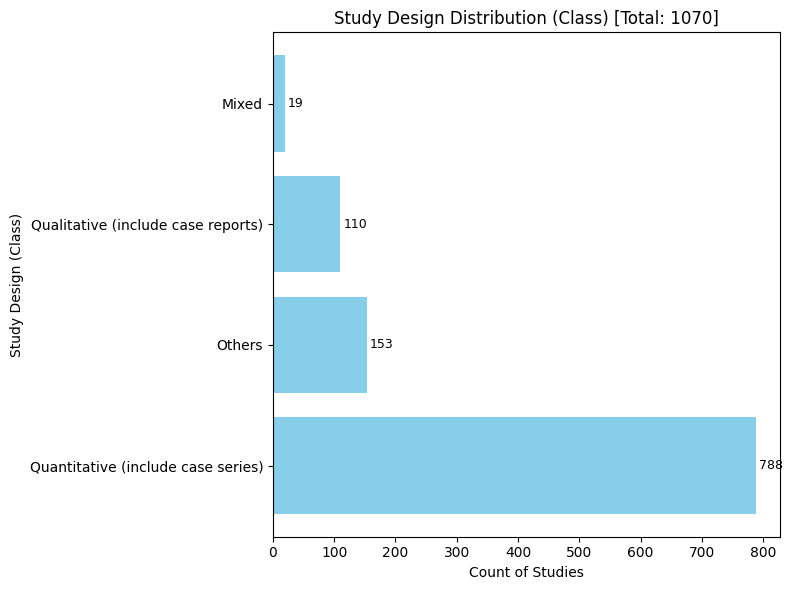

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv("REALQUAMI_Dataset_Merged.csv")

# 2. Merge redundant labels in the 'Class' column
# Convert to string and strip any extra whitespace
df['Class'] = df['Class'].astype(str).str.strip()

# Replace redundant variants with unified labels
df['Class'] = df['Class'].replace({
    'mixed': 'Mixed',
    'others': 'Others',
    'qualitative': 'Qualitative (include case reports)',
    'Qualitative (include case reports here)': 'Qualitative (include case reports)',
    'quantitative': 'Quantitative (include case series)'
})

# 3. Merge redundant labels in the 'Level' column
df['Level'] = df['Level'].astype(str).str.strip()
df['Level'] = df['Level'].replace({
    'primary (include case reports)': 'Primary (include case reports, case series)',
    'Primary (include case reports)': 'Primary (include case reports, case series)'
})

# Optional: Check merged counts to verify
print("Class counts:")
print(df['Class'].value_counts())
print("\nLevel counts:")
print(df['Level'].value_counts())

# 4. Generate a horizontal bar chart for the 'Class' column frequencies
# Sort the counts in ascending order so the largest appears at the top when we invert the y-axis.
class_counts = df['Class'].value_counts().sort_values(ascending=True)

# Create the plot
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.barh(class_counts.index, class_counts.values, color="skyblue", zorder=2)

# Set labels and title (the title includes the total number of cases)
total_cases = df.shape[0]
ax.set_title(f"Study Design Distribution (Class) [Total: {total_cases}]", fontsize=12)
ax.set_xlabel("Count of Studies")
ax.set_ylabel("Study Design (Class)")

# Annotate each bar with its count (positioned slightly to the right of the bar)
for bar in bars:
    width = bar.get_width()
    y_center = bar.get_y() + bar.get_height() / 2
    ax.text(width + 5, y_center, f"{int(width)}", va="center", ha="left", fontsize=9)

# Invert y-axis so the largest count is at the top
ax.invert_yaxis()

plt.tight_layout()
plt.show()

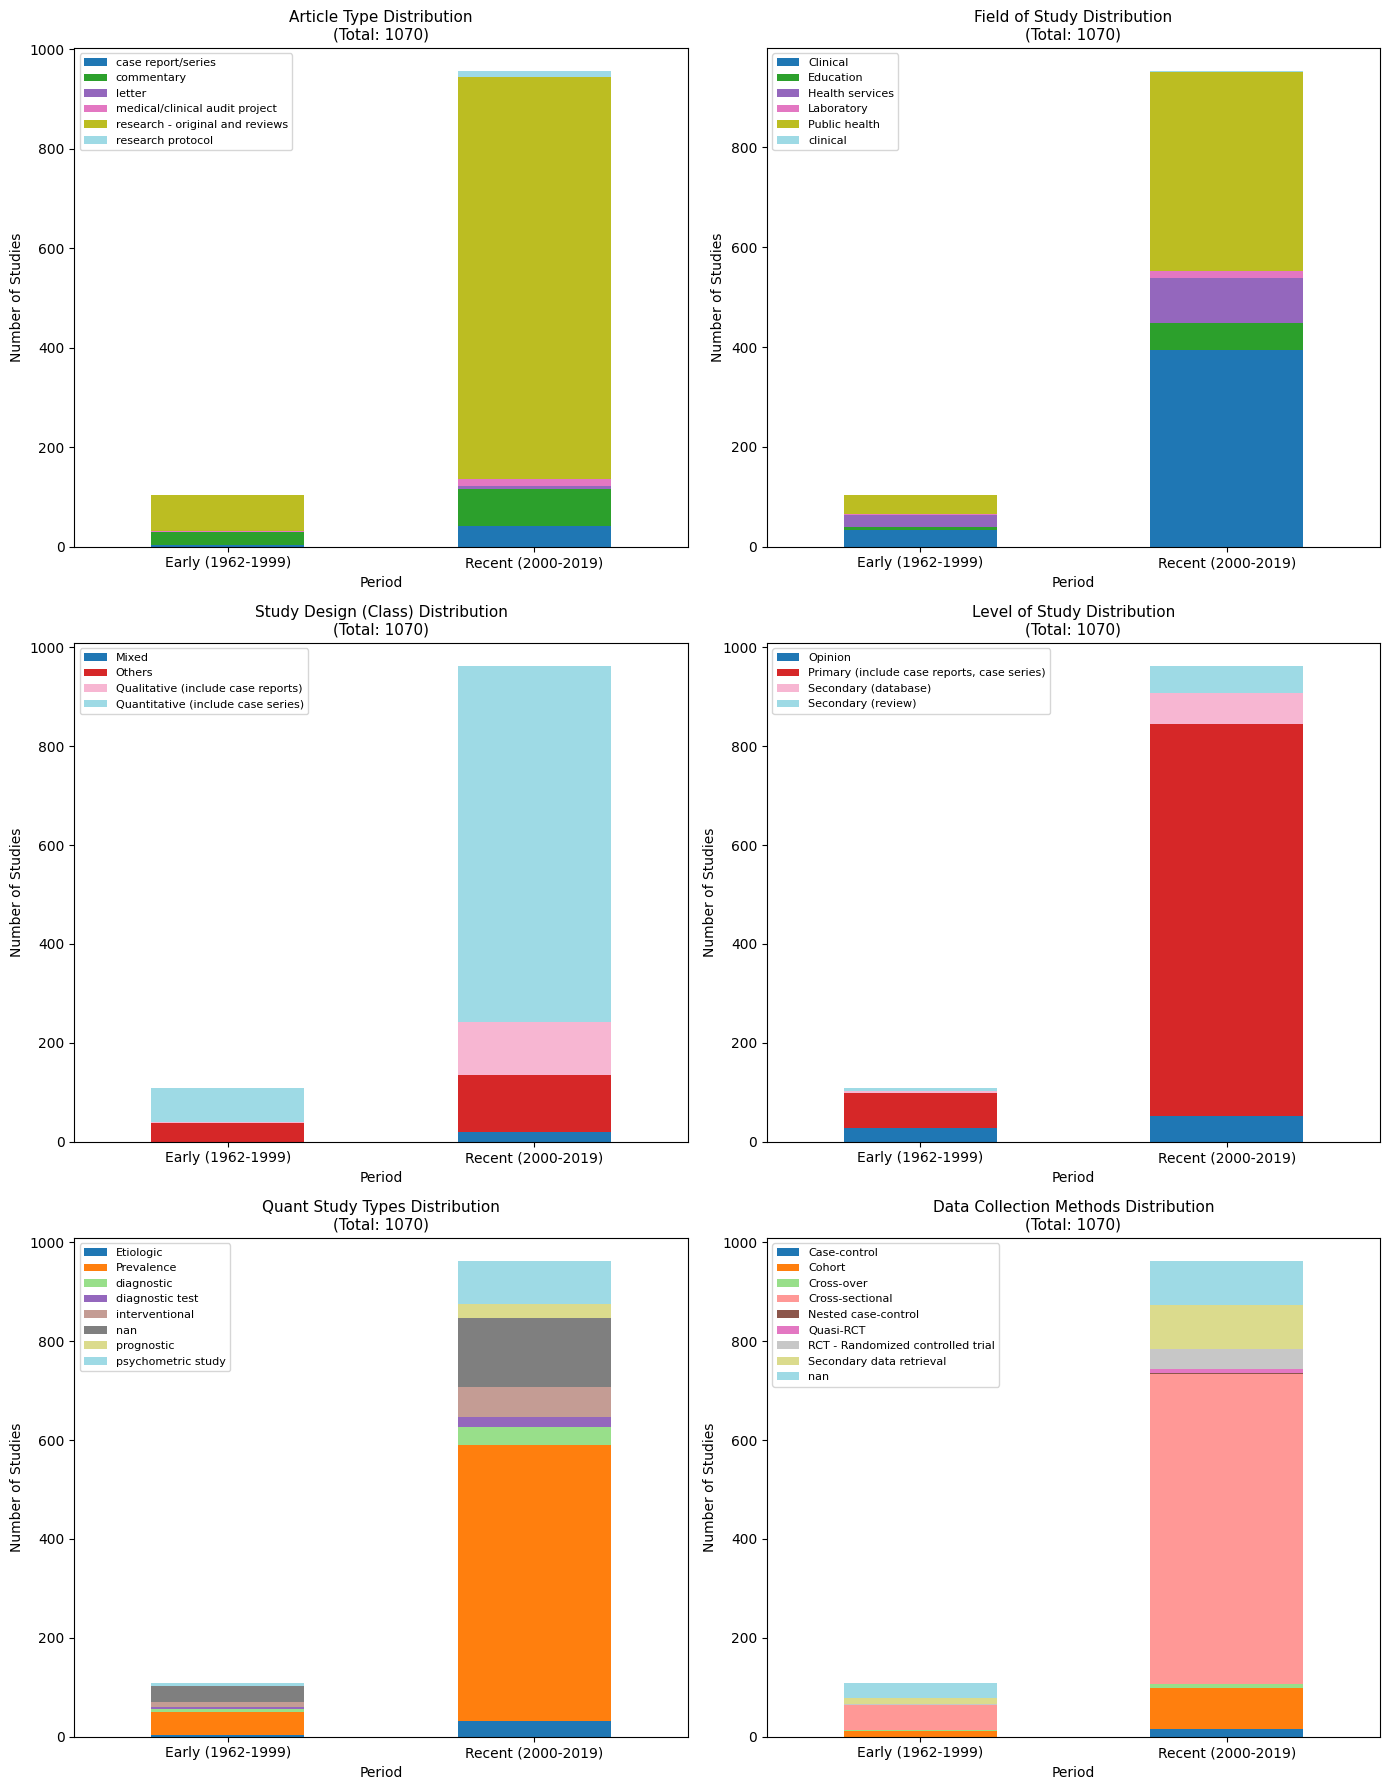

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# 1. Load Data
# -------------------------
df = pd.read_csv("REALQUAMI_Dataset_Merged.csv")

# -------------------------
# 2. Merge Redundant Labels
# -------------------------
# Merge redundant labels in "Class"
if "Class" in df.columns:
    df['Class'] = df['Class'].astype(str).str.strip().replace({
        'mixed': 'Mixed',
        'others': 'Others',
        'qualitative': 'Qualitative (include case reports)',
        'Qualitative (include case reports here)': 'Qualitative (include case reports)',
        'quantitative': 'Quantitative (include case series)'
    })

# Merge redundant labels in "Level"
if "Level" in df.columns:
    df['Level'] = df['Level'].astype(str).str.strip().replace({
        'primary (include case reports)': 'Primary (include case reports, case series)',
        'Primary (include case reports)': 'Primary (include case reports, case series)'
    })

# Merge redundant labels in "CatQuanti"
if "CatQuanti" in df.columns:
    df['CatQuanti'] = df['CatQuanti'].astype(str).str.strip().replace({
        'prevalence': 'Prevalence',
        'etiologic': 'Etiologic'
    })

# Merge redundant labels in "DataCollect"
if "DataCollect" in df.columns:
    df['DataCollect'] = df['DataCollect'].astype(str).str.strip().replace({
        'cross-section': 'Cross-sectional',
        'cross-sectional': 'Cross-sectional'
    })

# -------------------------
# 3. Create "Period" Column
# -------------------------
df['IDyear'] = pd.to_numeric(df['IDyear'], errors='coerce')
df['Period'] = df['IDyear'].apply(lambda x: 'Early (1962-1999)' if x < 2000 else 'Recent (2000-2019)')

# -------------------------
# 4. Create Pivot Tables by Period
# -------------------------
def pivot_by_period(dataframe, col_name):
    """Creates a pivot table with Period as rows and col_name categories as columns."""
    return dataframe.pivot_table(index='Period', columns=col_name, aggfunc='size', fill_value=0)

pivot_article = pivot_by_period(df, 'Article')
pivot_field   = pivot_by_period(df, 'Field')
pivot_class   = pivot_by_period(df, 'Class')
pivot_level   = pivot_by_period(df, 'Level')
pivot_quanti  = pivot_by_period(df, 'CatQuanti')
pivot_datac   = pivot_by_period(df, 'DataCollect')

pivots = [
    ("Article Type Distribution", pivot_article),
    ("Field of Study Distribution", pivot_field),
    ("Study Design (Class) Distribution", pivot_class),
    ("Level of Study Distribution", pivot_level),
    ("Quant Study Types Distribution", pivot_quanti),
    ("Data Collection Methods Distribution", pivot_datac),
]

# -------------------------
# 5. Plot the Six Stacked Bar Charts
# -------------------------
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for ax, (title, pivot_df) in zip(axes, pivots):
    pivot_df.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
    ax.set_title(f"{title}\n(Total: {df.shape[0]})", fontsize=11)
    ax.set_xlabel("Period")
    ax.set_ylabel("Number of Studies")
    # Place legend in the upper left corner and set font size
    ax.legend(loc='upper left', fontsize=8)
    # Set x-axis tick labels to horizontal
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

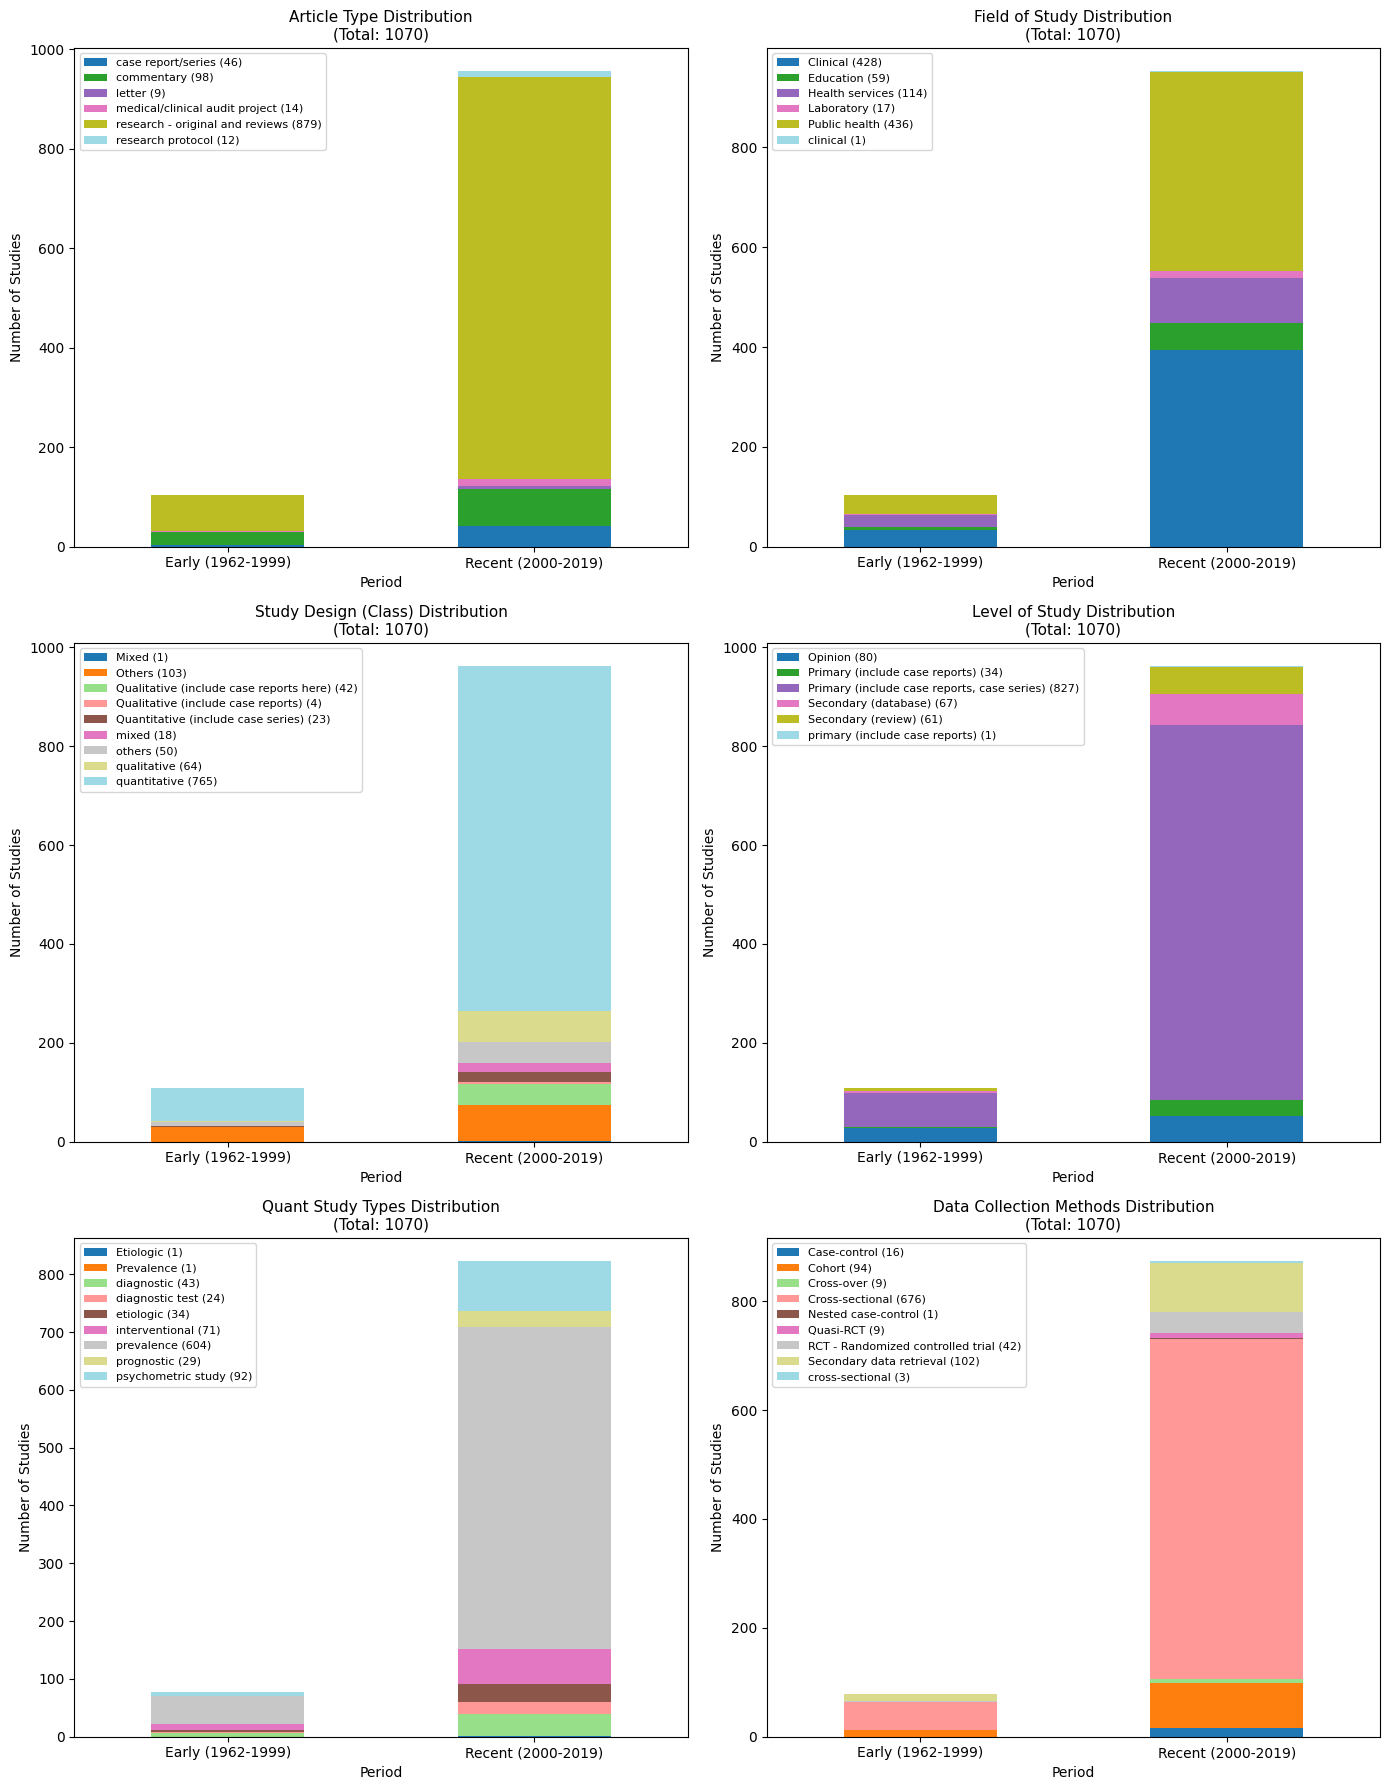

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# 1. Load Data
# -------------------------
df = pd.read_csv("REALQUAMI_Dataset_Merged.csv")

# Ensure IDyear is numeric
df['IDyear'] = pd.to_numeric(df['IDyear'], errors='coerce')

# Create a Period column (Early vs. Recent)
df['Period'] = df['IDyear'].apply(lambda x: 'Early (1962-1999)' if x < 2000 else 'Recent (2000-2019)')

# -------------------------
# 2. Create Pivot Tables by Period
# -------------------------
def pivot_by_period(dataframe, col_name):
    """Creates a pivot table with Period as index and the specified column's categories as columns."""
    return dataframe.pivot_table(index='Period', columns=col_name, aggfunc='size', fill_value=0)

pivot_article = pivot_by_period(df, 'Article')
pivot_field   = pivot_by_period(df, 'Field')
pivot_class   = pivot_by_period(df, 'Class')
pivot_level   = pivot_by_period(df, 'Level')
pivot_quanti  = pivot_by_period(df, 'CatQuanti')
pivot_datac   = pivot_by_period(df, 'DataCollect')

pivots = [
    ("Article Type Distribution", pivot_article),
    ("Field of Study Distribution", pivot_field),
    ("Study Design (Class) Distribution", pivot_class),
    ("Level of Study Distribution", pivot_level),
    ("Quant Study Types Distribution", pivot_quanti),
    ("Data Collection Methods Distribution", pivot_datac),
]

# -------------------------
# 3. Plot the Six Stacked Bar Charts
# -------------------------
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for ax, (title, pivot_df) in zip(axes, pivots):
    # Compute total count for each subvariable (column) across periods
    col_sums = pivot_df.sum(axis=0)
    # Create a dictionary to rename columns to include count, e.g., "Case reports" -> "Case reports (45)"
    rename_map = {col: f"{col} ({int(col_sums[col])})" for col in pivot_df.columns}
    # Rename the pivot table's columns
    pivot_renamed = pivot_df.rename(columns=rename_map)
    
    # Plot the stacked bar chart using the renamed pivot table
    pivot_renamed.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
    ax.set_title(f"{title}\n(Total: {df.shape[0]})", fontsize=11)
    ax.set_xlabel("Period")
    ax.set_ylabel("Number of Studies")
    # Place legend in the top-left corner to avoid overlapping the bars
    ax.legend(loc='upper left', fontsize=8)
    # Set x-axis tick labels to horizontal
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

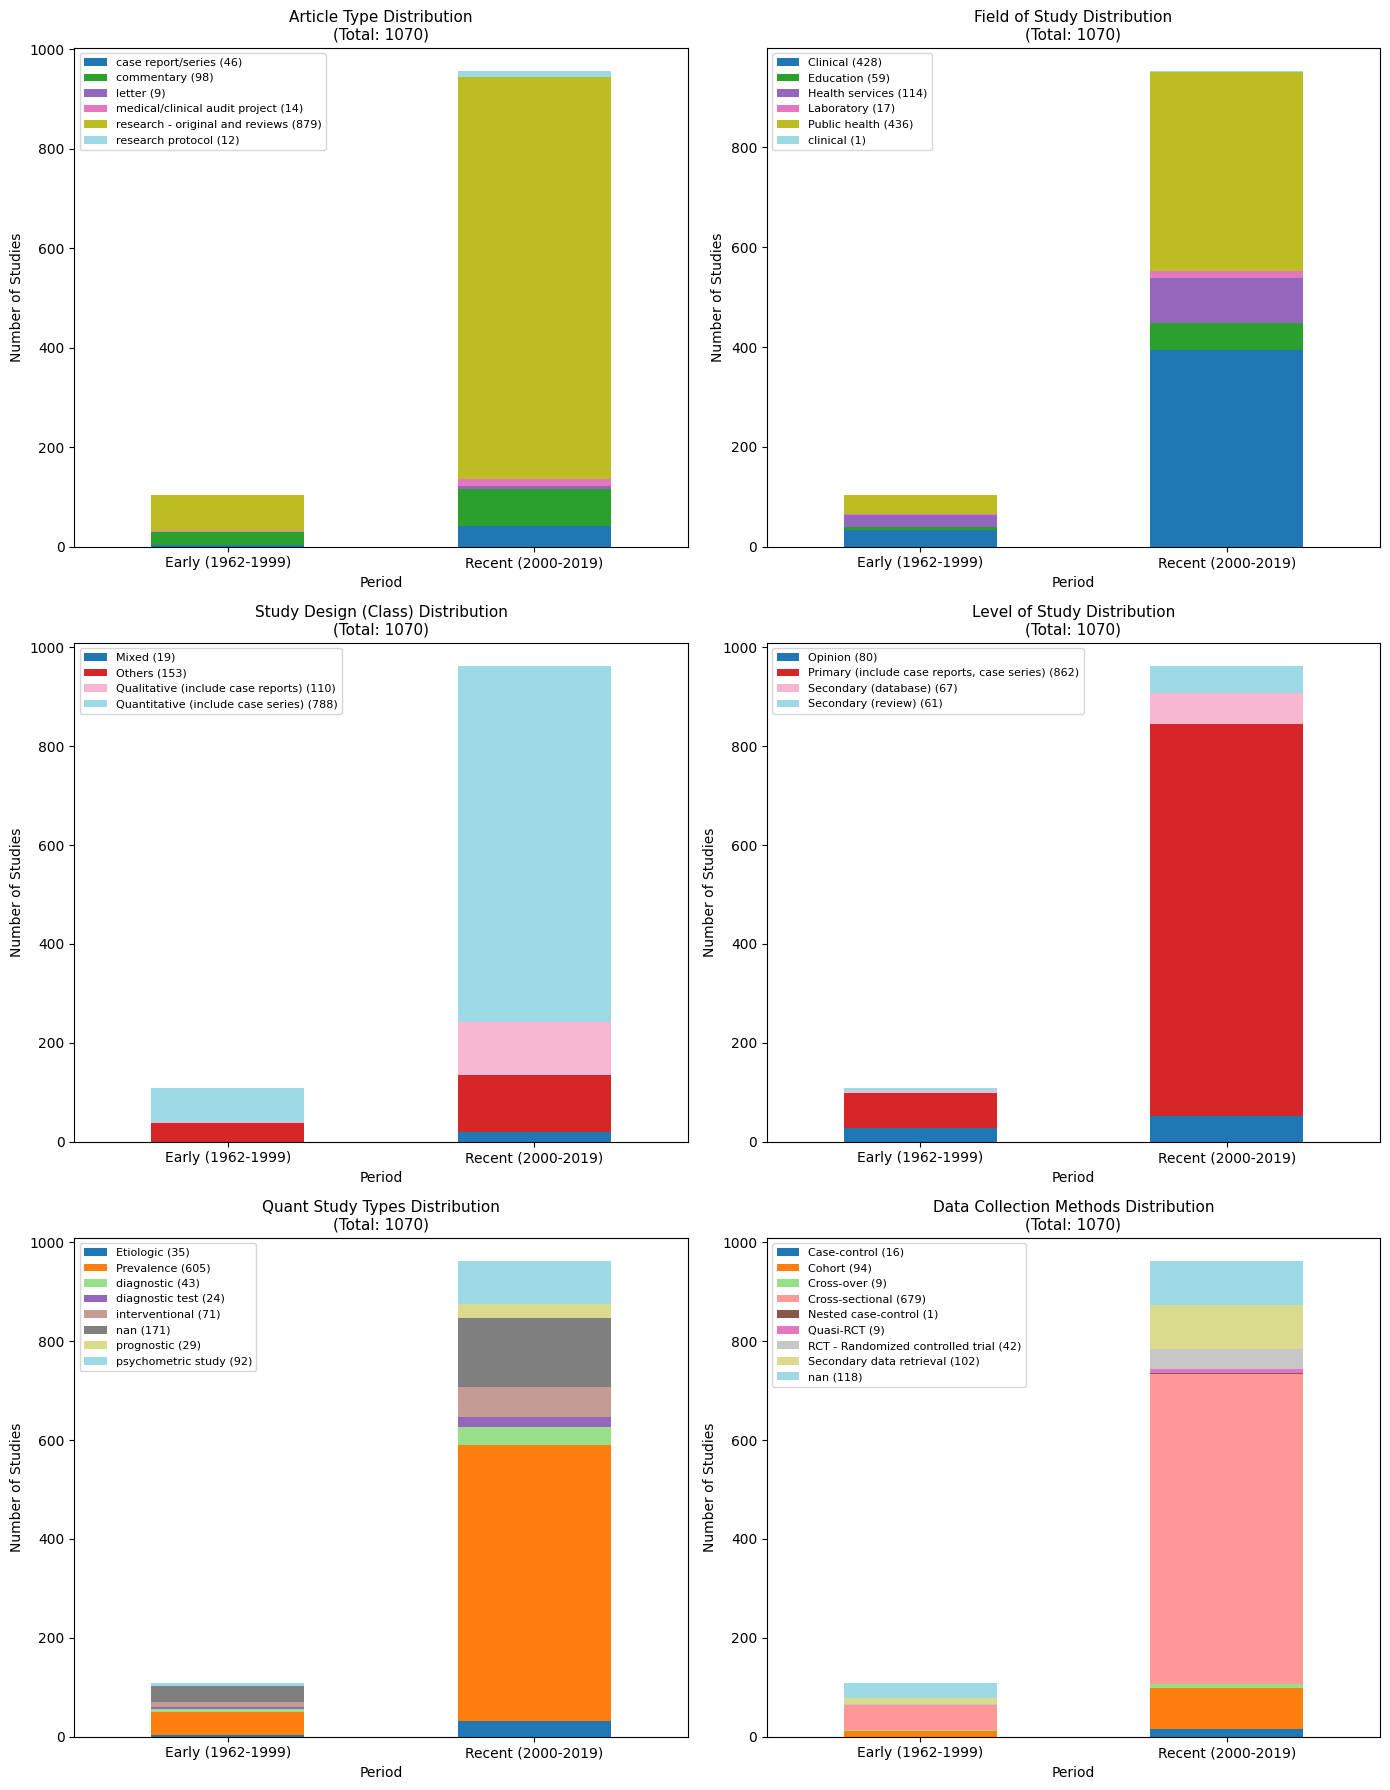

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# 1. Load Data
# -------------------------
df = pd.read_csv("REALQUAMI_Dataset_Merged.csv")

# -------------------------
# 2. Merge Redundant Labels
# -------------------------
# Ensure string columns are stripped of extra whitespace
# Merge redundant variants in "Class"
if "Class" in df.columns:
    df['Class'] = df['Class'].astype(str).str.strip().replace({
        'mixed': 'Mixed',
        'others': 'Others',
        'qualitative': 'Qualitative (include case reports)',
        'Qualitative (include case reports here)': 'Qualitative (include case reports)',
        'quantitative': 'Quantitative (include case series)'
    })

# Merge redundant variants in "Level"
if "Level" in df.columns:
    df['Level'] = df['Level'].astype(str).str.strip().replace({
        'primary (include case reports)': 'Primary (include case reports, case series)',
        'Primary (include case reports)': 'Primary (include case reports, case series)'
    })

# Merge redundant variants in "CatQuanti"
if "CatQuanti" in df.columns:
    df['CatQuanti'] = df['CatQuanti'].astype(str).str.strip().replace({
        'prevalence': 'Prevalence',
        'etiologic': 'Etiologic'
    })

# Merge redundant variants in "DataCollect"
if "DataCollect" in df.columns:
    df['DataCollect'] = df['DataCollect'].astype(str).str.strip().replace({
        'cross-section': 'Cross-sectional',
        'cross-sectional': 'Cross-sectional'
    })

# -------------------------
# 3. Create "Period" Column
# -------------------------
df['IDyear'] = pd.to_numeric(df['IDyear'], errors='coerce')
df['Period'] = df['IDyear'].apply(lambda x: 'Early (1962-1999)' if x < 2000 else 'Recent (2000-2019)')

# -------------------------
# 4. Create Pivot Tables by Period
# -------------------------
def pivot_by_period(dataframe, col_name):
    """Creates a pivot table with Period as index and col_name categories as columns."""
    return dataframe.pivot_table(index='Period', columns=col_name, aggfunc='size', fill_value=0)

pivot_article = pivot_by_period(df, 'Article')
pivot_field   = pivot_by_period(df, 'Field')
pivot_class   = pivot_by_period(df, 'Class')
pivot_level   = pivot_by_period(df, 'Level')
pivot_quanti  = pivot_by_period(df, 'CatQuanti')
pivot_datac   = pivot_by_period(df, 'DataCollect')

pivots = [
    ("Article Type Distribution", pivot_article),
    ("Field of Study Distribution", pivot_field),
    ("Study Design (Class) Distribution", pivot_class),
    ("Level of Study Distribution", pivot_level),
    ("Quant Study Types Distribution", pivot_quanti),
    ("Data Collection Methods Distribution", pivot_datac),
]

# -------------------------
# 5. Plot the Six Stacked Bar Charts
# -------------------------
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for ax, (title, pivot_df) in zip(axes, pivots):
    # Calculate the total count for each subvariable (column) across periods
    col_sums = pivot_df.sum(axis=0)
    # Build a rename map to append count to each subvariable label, e.g., "Case reports" -> "Case reports (45)"
    rename_map = {col: f"{col} ({int(col_sums[col])})" for col in pivot_df.columns}
    pivot_renamed = pivot_df.rename(columns=rename_map)
    
    # Plot the stacked bar chart using the renamed pivot table
    pivot_renamed.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
    ax.set_title(f"{title}\n(Total: {df.shape[0]})", fontsize=11)
    ax.set_xlabel("Period")
    ax.set_ylabel("Number of Studies")
    # Place legend in the top-left to avoid overlapping bars
    ax.legend(loc='upper left', fontsize=8)
    # Set x-axis tick labels horizontally
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

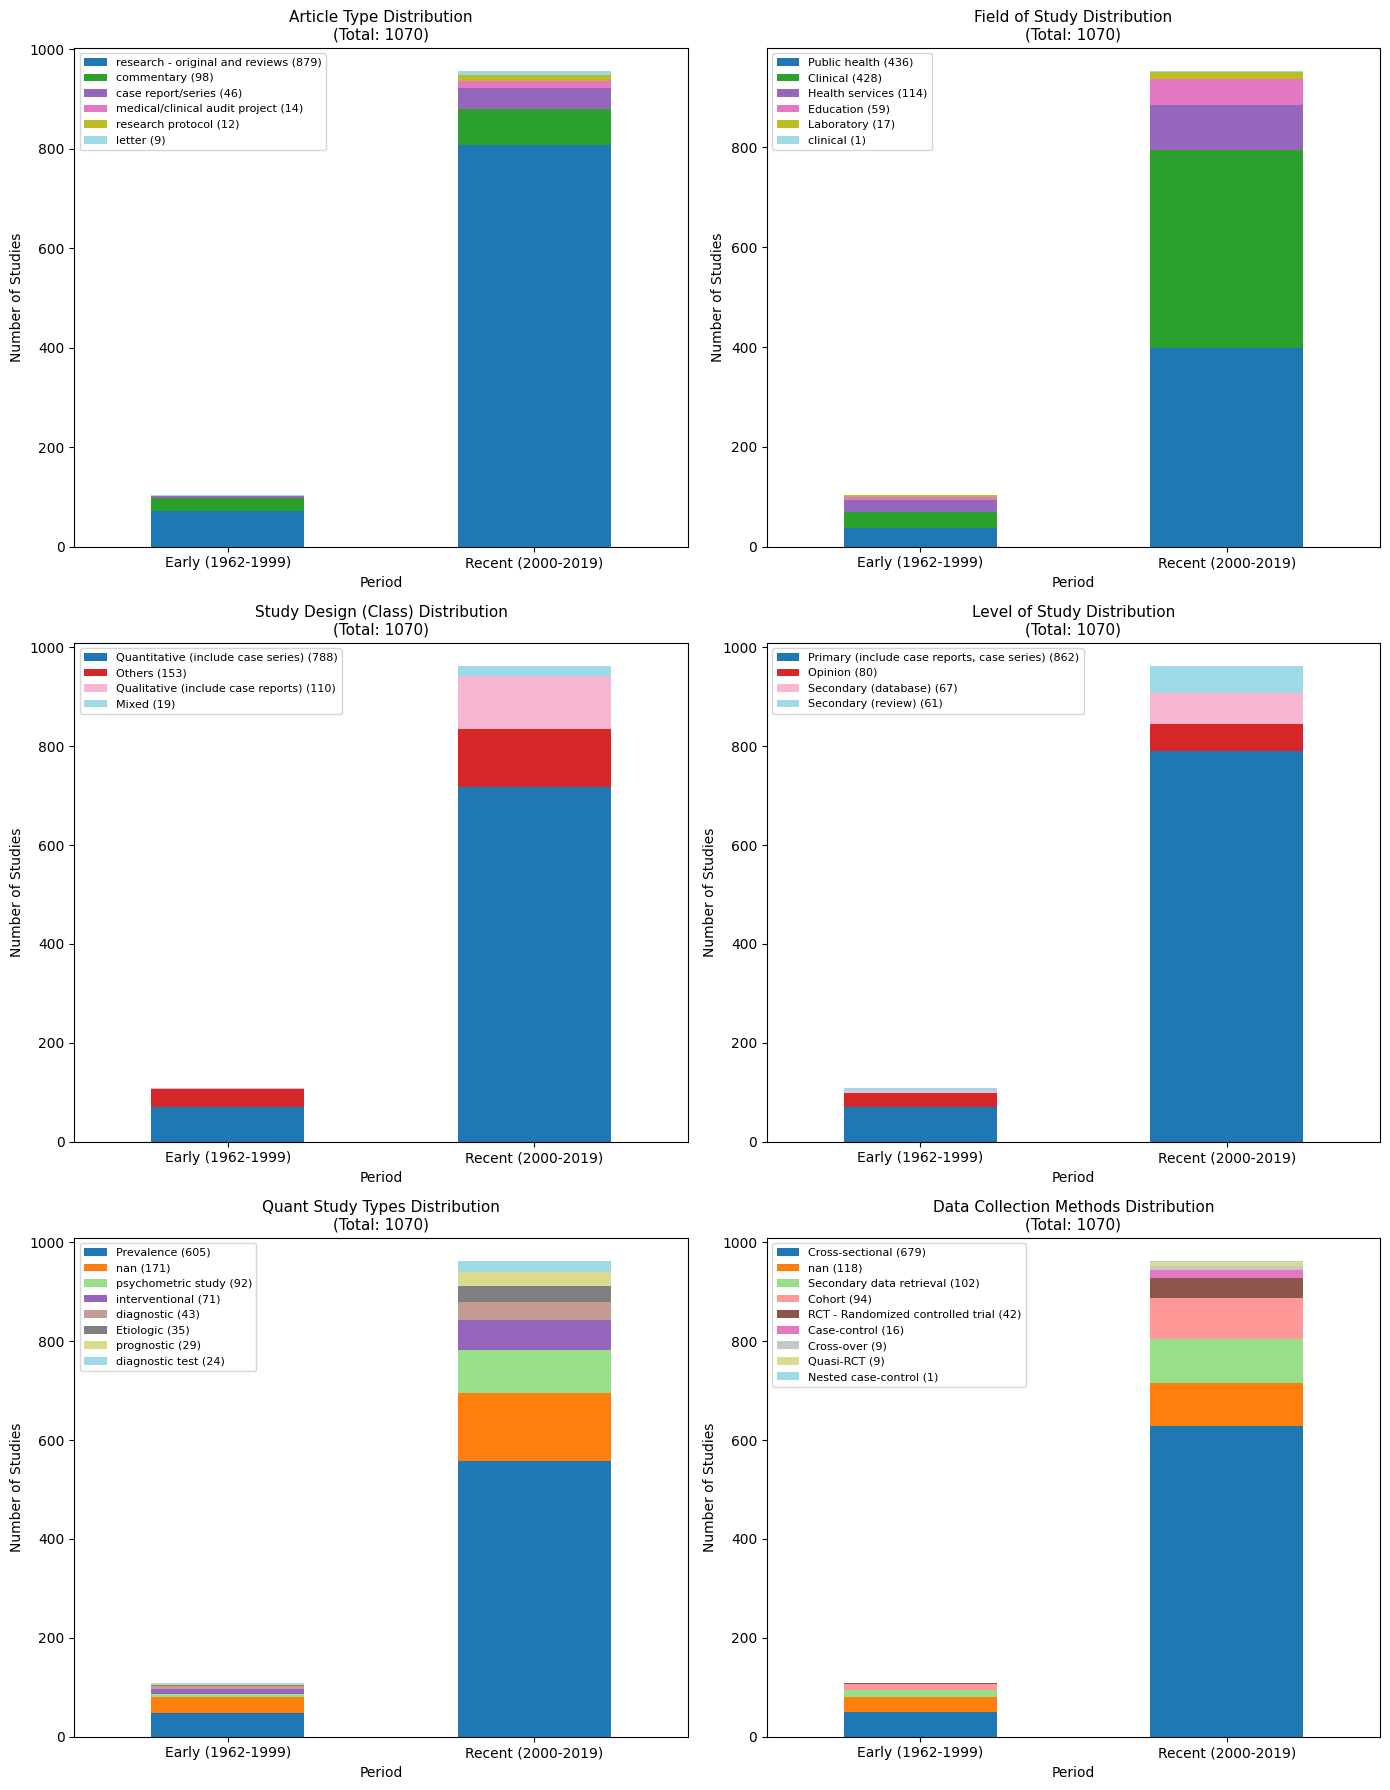

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# 1. Load Data
# -------------------------
df = pd.read_csv("REALQUAMI_Dataset_Merged.csv")

# -------------------------
# 2. Merge Redundant Labels
# -------------------------
# Merge redundant variants in "Class"
if "Class" in df.columns:
    df['Class'] = df['Class'].astype(str).str.strip().replace({
        'mixed': 'Mixed',
        'others': 'Others',
        'qualitative': 'Qualitative (include case reports)',
        'Qualitative (include case reports here)': 'Qualitative (include case reports)',
        'quantitative': 'Quantitative (include case series)'
    })

# Merge redundant variants in "Level"
if "Level" in df.columns:
    df['Level'] = df['Level'].astype(str).str.strip().replace({
        'primary (include case reports)': 'Primary (include case reports, case series)',
        'Primary (include case reports)': 'Primary (include case reports, case series)'
    })

# Merge redundant variants in "CatQuanti"
if "CatQuanti" in df.columns:
    df['CatQuanti'] = df['CatQuanti'].astype(str).str.strip().replace({
        'prevalence': 'Prevalence',
        'etiologic': 'Etiologic'
    })

# Merge redundant variants in "DataCollect"
if "DataCollect" in df.columns:
    df['DataCollect'] = df['DataCollect'].astype(str).str.strip().replace({
        'cross-section': 'Cross-sectional',
        'cross-sectional': 'Cross-sectional'
    })

# -------------------------
# 3. Create "Period" Column
# -------------------------
df['IDyear'] = pd.to_numeric(df['IDyear'], errors='coerce')
df['Period'] = df['IDyear'].apply(lambda x: 'Early (1962-1999)' if x < 2000 else 'Recent (2000-2019)')

# -------------------------
# 4. Create Pivot Tables by Period for six variables
# -------------------------
def pivot_by_period(dataframe, col_name):
    """Creates a pivot table with Period as index and col_name categories as columns."""
    return dataframe.pivot_table(index='Period', columns=col_name, aggfunc='size', fill_value=0)

pivot_article = pivot_by_period(df, 'Article')
pivot_field   = pivot_by_period(df, 'Field')
pivot_class   = pivot_by_period(df, 'Class')
pivot_level   = pivot_by_period(df, 'Level')
pivot_quanti  = pivot_by_period(df, 'CatQuanti')
pivot_datac   = pivot_by_period(df, 'DataCollect')

pivots = [
    ("Article Type Distribution", pivot_article),
    ("Field of Study Distribution", pivot_field),
    ("Study Design (Class) Distribution", pivot_class),
    ("Level of Study Distribution", pivot_level),
    ("Quant Study Types Distribution", pivot_quanti),
    ("Data Collection Methods Distribution", pivot_datac),
]

# -------------------------
# 5. Plot the Six Stacked Bar Charts with Reordered Columns
# -------------------------
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for ax, (title, pivot_df) in zip(axes, pivots):
    # Order columns so that subvariables are in descending order by overall count (largest at bottom)
    ordered_cols = pivot_df.sum(axis=0).sort_values(ascending=False).index.tolist()
    pivot_ordered = pivot_df[ordered_cols]
    
    # Compute total counts for each subvariable and create a rename mapping for legend labels
    col_sums = pivot_ordered.sum(axis=0)
    rename_map = {col: f"{col} ({int(col_sums[col])})" for col in pivot_ordered.columns}
    pivot_renamed = pivot_ordered.rename(columns=rename_map)
    
    # Plot the stacked bar chart using the renamed pivot table
    pivot_renamed.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
    ax.set_title(f"{title}\n(Total: {df.shape[0]})", fontsize=11)
    ax.set_xlabel("Period")
    ax.set_ylabel("Number of Studies")
    # Place legend in the top-left to avoid overlapping the bars
    ax.legend(loc='upper left', fontsize=8)
    # Set x-axis tick labels to horizontal
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

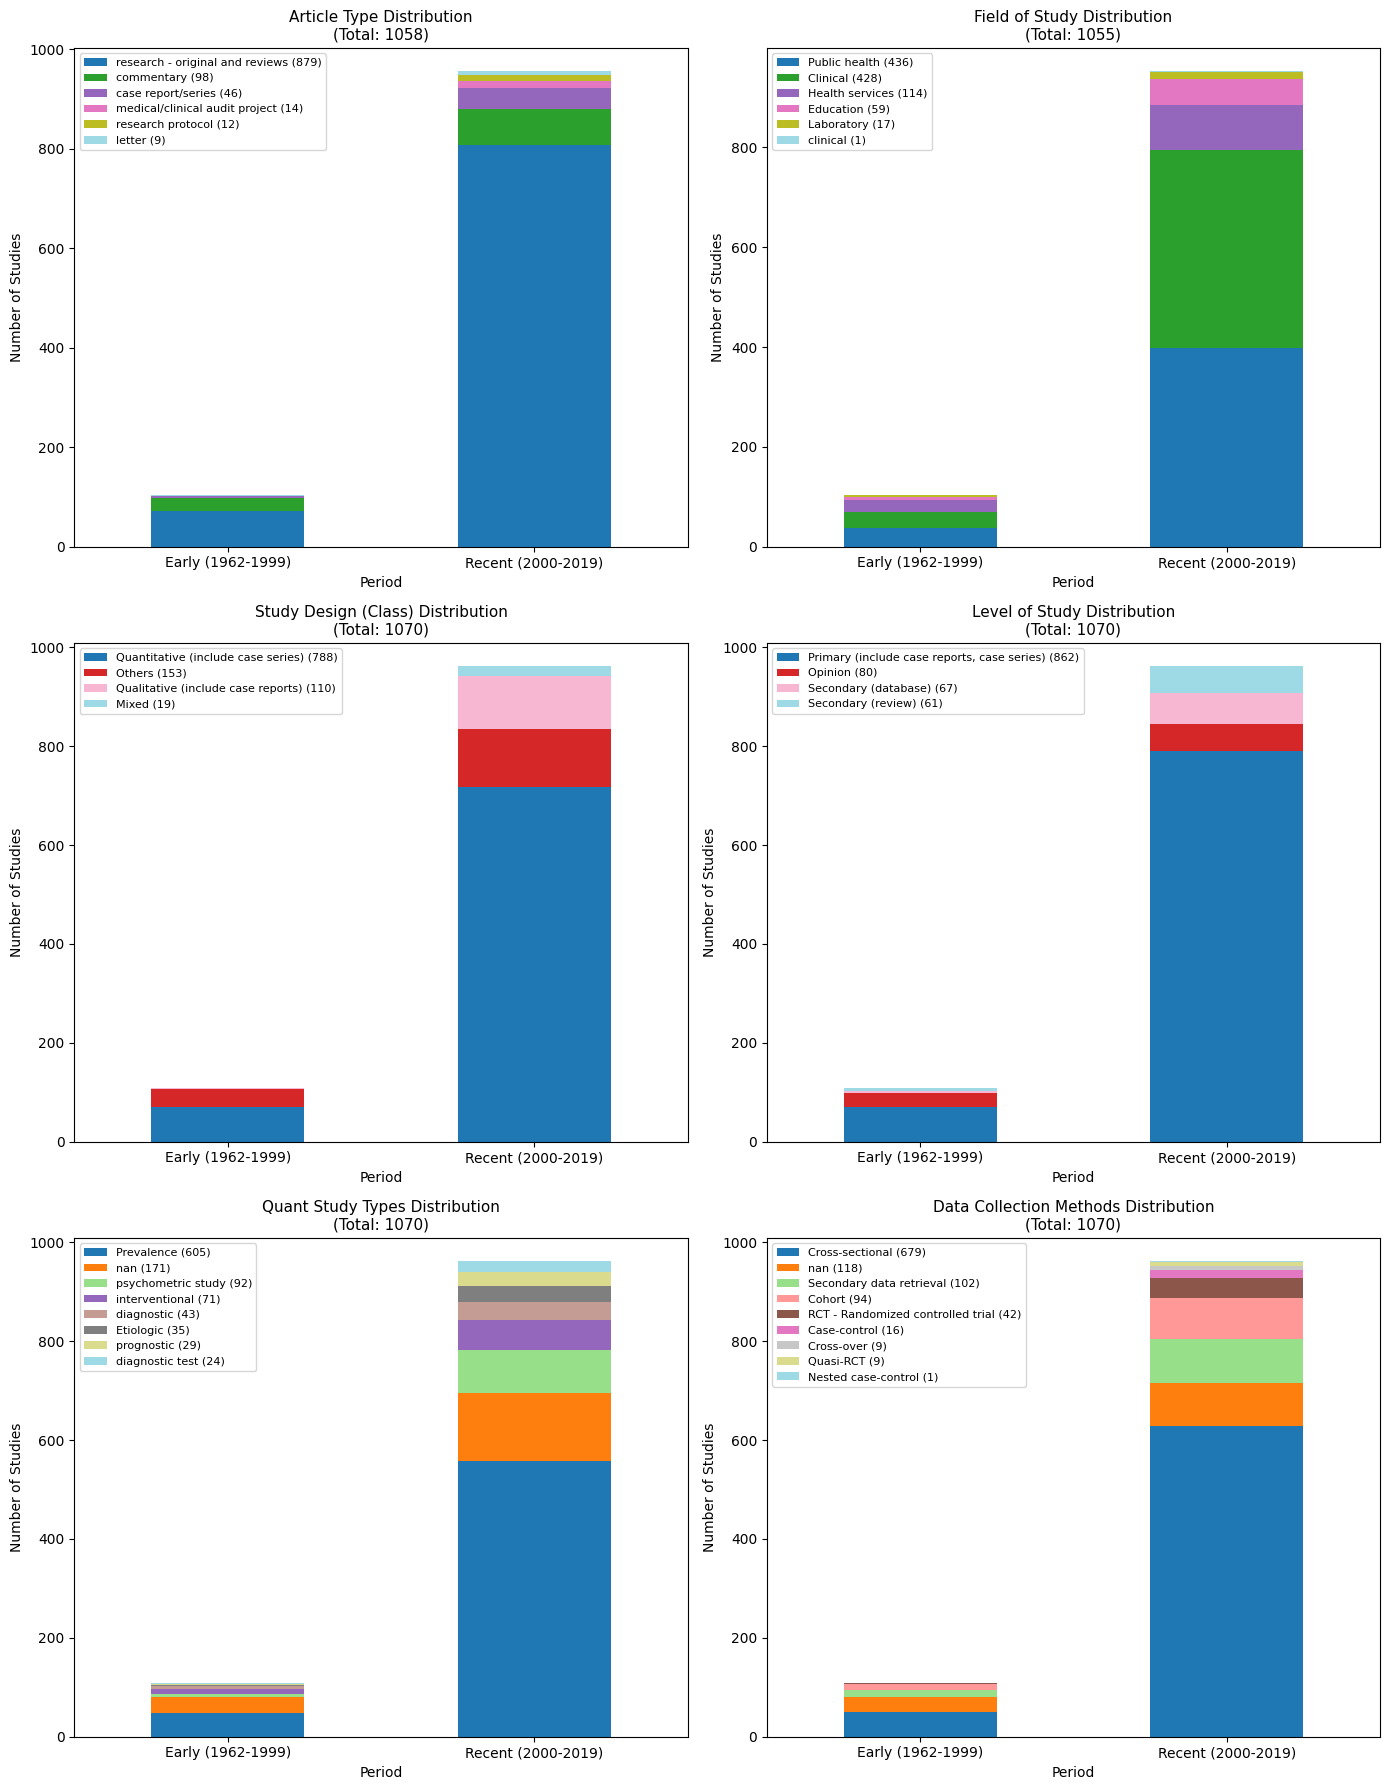

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# 1. Load Data
# -------------------------
df = pd.read_csv("REALQUAMI_Dataset_Merged.csv")

# -------------------------
# 2. Merge Redundant Labels
# -------------------------
# Merge redundant variants in "Class"
if "Class" in df.columns:
    df['Class'] = df['Class'].astype(str).str.strip().replace({
        'mixed': 'Mixed',
        'others': 'Others',
        'qualitative': 'Qualitative (include case reports)',
        'Qualitative (include case reports here)': 'Qualitative (include case reports)',
        'quantitative': 'Quantitative (include case series)'
    })

# Merge redundant variants in "Level"
if "Level" in df.columns:
    df['Level'] = df['Level'].astype(str).str.strip().replace({
        'primary (include case reports)': 'Primary (include case reports, case series)',
        'Primary (include case reports)': 'Primary (include case reports, case series)'
    })

# Merge redundant variants in "CatQuanti"
if "CatQuanti" in df.columns:
    df['CatQuanti'] = df['CatQuanti'].astype(str).str.strip().replace({
        'prevalence': 'Prevalence',
        'etiologic': 'Etiologic'
    })

# Merge redundant variants in "DataCollect"
if "DataCollect" in df.columns:
    df['DataCollect'] = df['DataCollect'].astype(str).str.strip().replace({
        'cross-section': 'Cross-sectional',
        'cross-sectional': 'Cross-sectional'
    })

# -------------------------
# 3. Create "Period" Column
# -------------------------
df['IDyear'] = pd.to_numeric(df['IDyear'], errors='coerce')
df['Period'] = df['IDyear'].apply(lambda x: 'Early (1962-1999)' if x < 2000 else 'Recent (2000-2019)')

# -------------------------
# 4. Create Pivot Tables by Period for six variables
# -------------------------
def pivot_by_period(dataframe, col_name):
    """Creates a pivot table with Period as index and col_name categories as columns."""
    return dataframe.pivot_table(index='Period', columns=col_name, aggfunc='size', fill_value=0)

pivot_article = pivot_by_period(df, 'Article')
pivot_field   = pivot_by_period(df, 'Field')
pivot_class   = pivot_by_period(df, 'Class')
pivot_level   = pivot_by_period(df, 'Level')
pivot_quanti  = pivot_by_period(df, 'CatQuanti')
pivot_datac   = pivot_by_period(df, 'DataCollect')

pivots = [
    ("Article Type Distribution", pivot_article),
    ("Field of Study Distribution", pivot_field),
    ("Study Design (Class) Distribution", pivot_class),
    ("Level of Study Distribution", pivot_level),
    ("Quant Study Types Distribution", pivot_quanti),
    ("Data Collection Methods Distribution", pivot_datac),
]

# -------------------------
# 5. Plot the Six Stacked Bar Charts with Reordered Columns and Correct Totals
# -------------------------
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for ax, (title, pivot_df) in zip(axes, pivots):
    # Order columns so that subvariables are in descending order by overall count (largest at bottom)
    ordered_cols = pivot_df.sum(axis=0).sort_values(ascending=False).index.tolist()
    pivot_ordered = pivot_df[ordered_cols]
    
    # Compute total counts for each subvariable and create a rename mapping for legend labels
    col_sums = pivot_ordered.sum(axis=0)
    rename_map = {col: f"{col} ({int(col_sums[col])})" for col in pivot_ordered.columns}
    pivot_renamed = pivot_ordered.rename(columns=rename_map)
    
    # Calculate the total count for the chart (i.e., the sum of all cells in the pivot table)
    chart_total = pivot_df.values.sum()
    
    # Plot the stacked bar chart using the renamed pivot table
    pivot_renamed.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
    ax.set_title(f"{title}\n(Total: {int(chart_total)})", fontsize=11)
    ax.set_xlabel("Period")
    ax.set_ylabel("Number of Studies")
    # Place legend in the top-left to avoid overlapping bars
    ax.legend(loc='upper left', fontsize=8)
    # Set x-axis tick labels to horizontal
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()